# Analisis descriptivo

Hagamos un analisis descriptivo de los datos si bien es cierto que el modelo de bosques aleatorios que construirmos es robusto y no es sencible a valores atipicos o a que las variables sigan una distribucion normal, este analisis nos ayudara a enterder las distintas variables de nuestro dataset mediante el uso de graficos etc

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_wine = pd.read_csv("dataset/wine_ready.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Vamos a cambiar la columna 'quality_binary' a tipo categorico y a sustituir sus valores por:

- 0 = 'vino de baja calidad',
- 1 = 'vino de alta calidad'

Esto ya lo decidimos anteriormente en la fase de limpieza de los datos

In [6]:
# Renombramos los valores de la columna 'quality_binary'
df_wine['quality_binary'] = df_wine['quality_binary'].replace({
    0: 'vino de baja calidad',
    1: 'vino de alta calidad'
})


Miremos nuevamente un resumen de las estadisticas descriptivas de nuestro datos

In [7]:
# 1. Análisis estadístico de las variables numéricas
print("--- Análisis Descriptivo de Variables Numéricas ---")
df_wine.describe()

--- Análisis Descriptivo de Variables Numéricas ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Contemos cuantos vinos de alta y baja calidad tenemos en nuestro dataset

In [8]:
# 2. Conteo de la variable de calidad binaria
print("\n--- Conteo de Vinos por Calidad ---")
print(df_wine['quality_binary'].value_counts())


--- Conteo de Vinos por Calidad ---
quality_binary
vino de alta calidad    855
vino de baja calidad    744
Name: count, dtype: int64


Veamos ahora mediante unas graficas de como se comportan las distintas variables de nuestro dataset

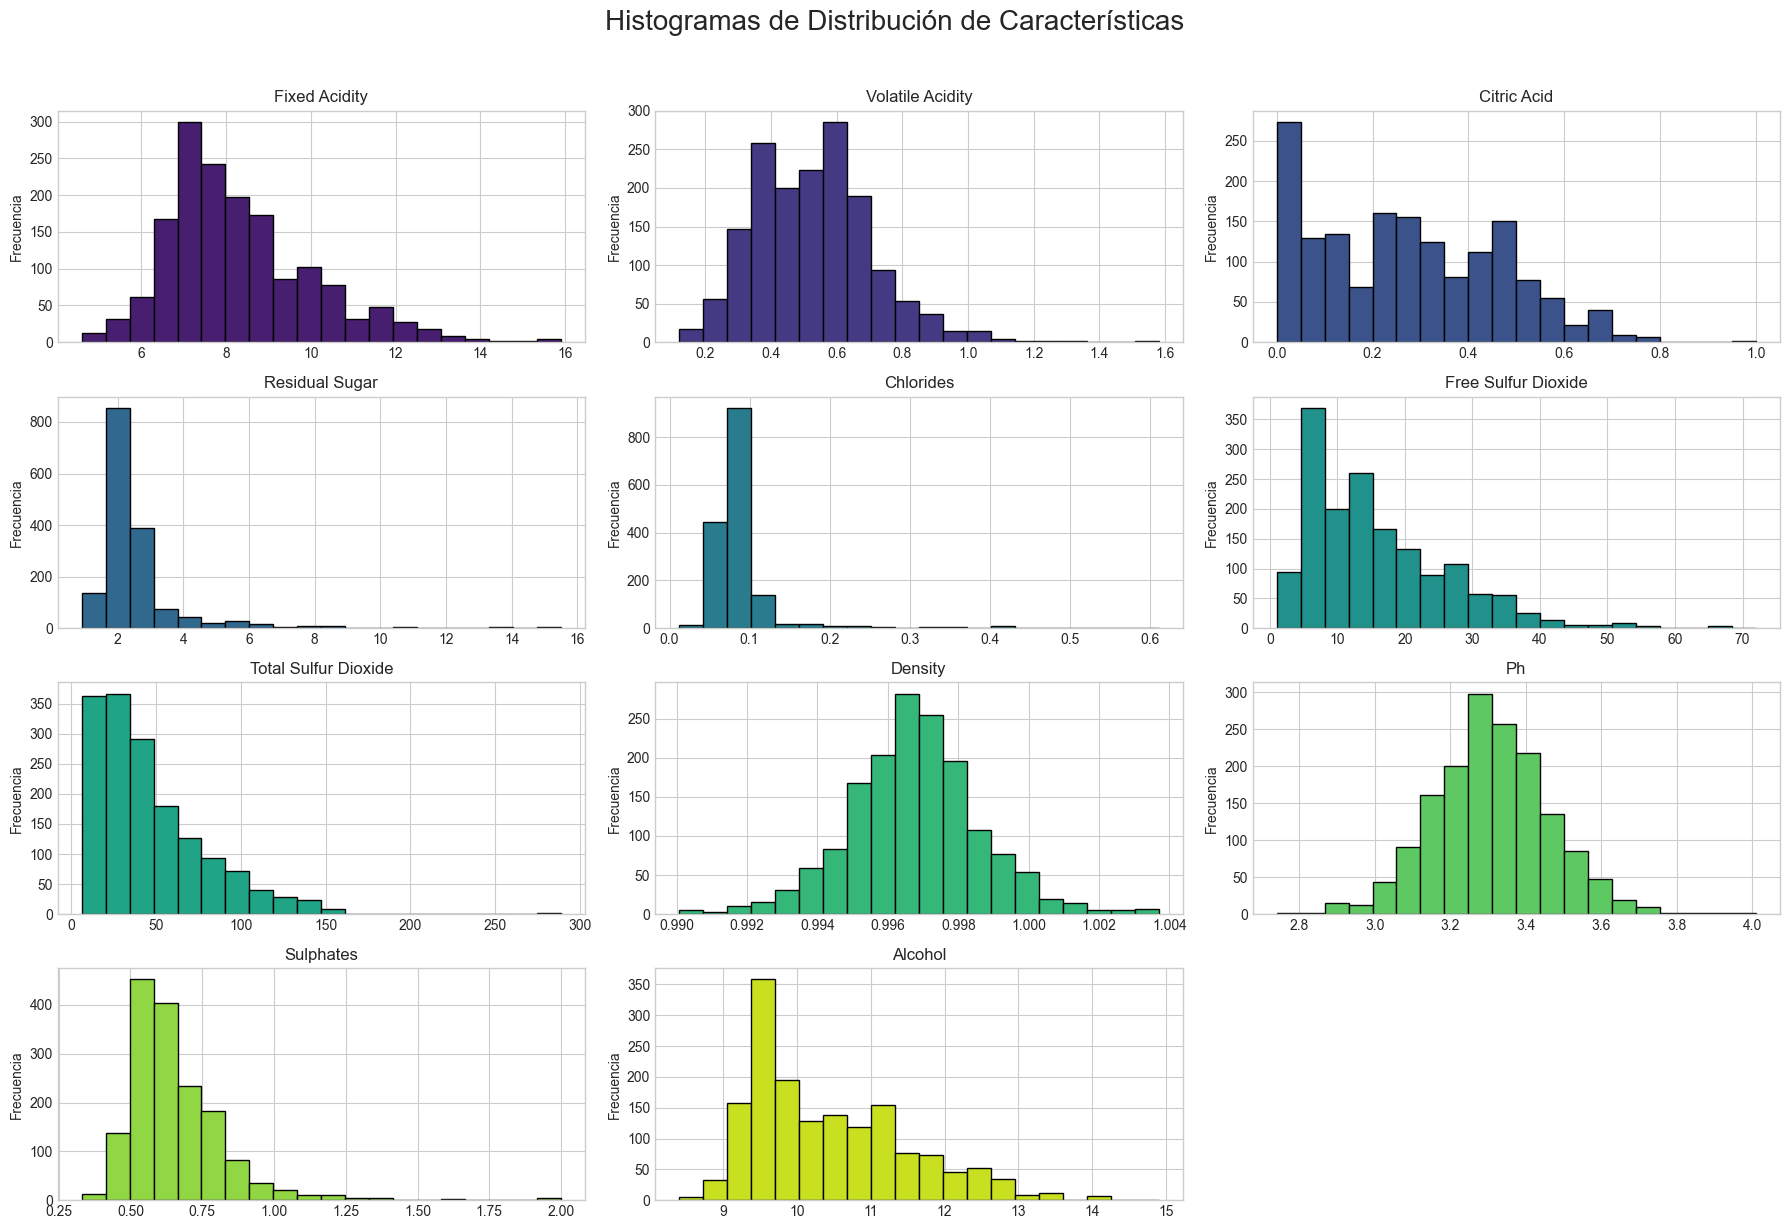

In [11]:
# Creamos un conjunto de gráficos para ver la distribución de cada característica
plt.style.use('seaborn-v0_8-whitegrid')

# Definimos una paleta de colores para los gráficos
palette = sns.color_palette("viridis", n_colors=len(df_wine.select_dtypes(include=np.number).columns))

# Obtenemos las columnas numéricas para el bucle
numerical_cols = df_wine.select_dtypes(include=np.number).columns.tolist()

# Configuramos la cuadrícula de subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten() # Aplanamos el array de ejes para iterar fácilmente

# Creamos un histograma para cada característica con un color diferente
for i, col in enumerate(numerical_cols):
    axes[i].hist(df_wine[col], bins=20, color=palette[i], edgecolor='black')
    axes[i].set_title(col.replace("_", " ").title())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Ocultamos los subplots que no se usen
for i in range(len(numerical_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Histogramas de Distribución de Características', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

Por ultimo veamos nuevamente la matriz de correlacion para ver como se interelacionan las variables de nuestro dataset

¿ Por que para la matriz de correlacion 'quality_binary' es tratada como variable numerica ?

En este caso, los valores 0 y 1 son lo suficientemente significativos para que el cálculo de la correlación nos brinde información valiosa. Nuestra matriz de correlación nos mostrará cuáles son las variables numéricas que están más fuertemente asociadas con la calidad del vino.

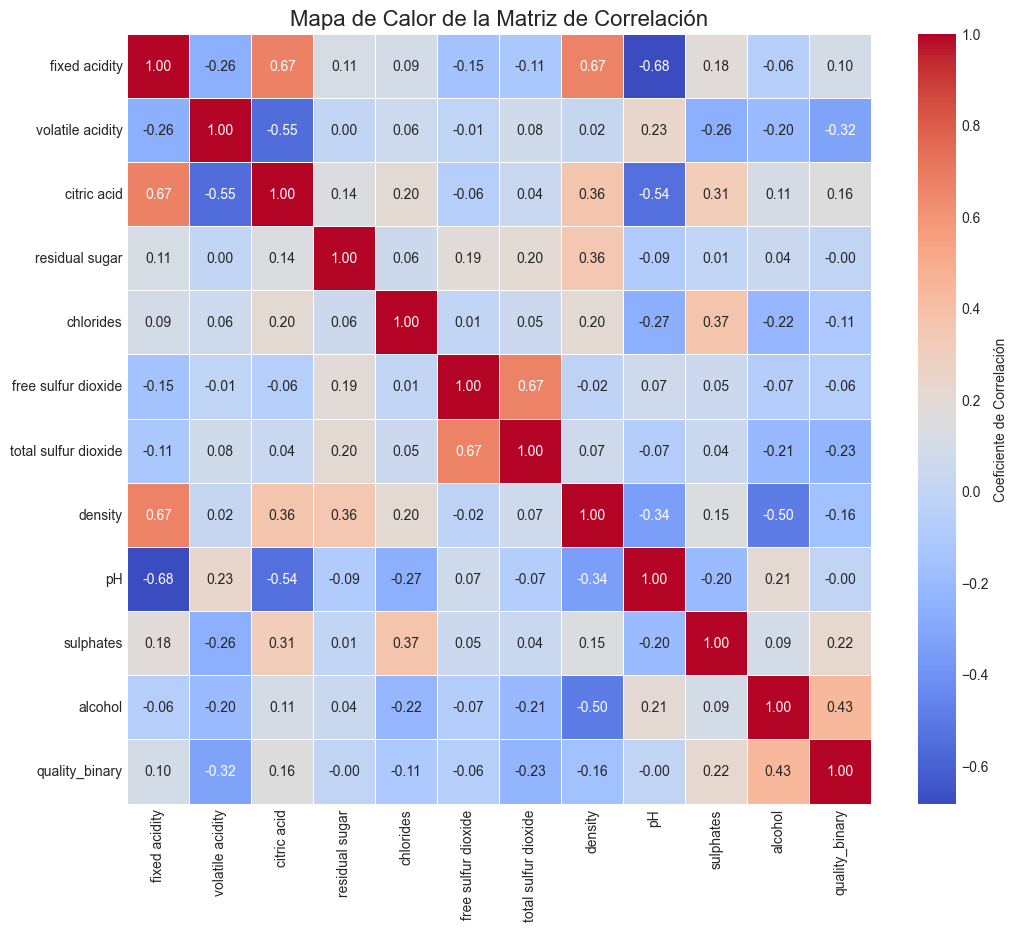

In [14]:
# Calculamos la matriz de correlación
correlation_matrix = df_wine.corr()

# Creamos el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=16)
plt.show()

#### Conclusiones

En este análisis, exploré el dataset de vinos para comprender mejor sus características y la relación entre ellas. Transformé la variable `quality_binary` en una categoría para distinguir claramente entre vinos de alta y baja calidad. Analicé las estadísticas descriptivas y la distribución de las variables numéricas, lo que me permitió identificar tendencias y posibles valores atípicos.

A través de la matriz de correlación, observé que variables como el alcohol, la acidez volátil, los sulfitos y el ácido cítrico tienen una mayor asociación con la calidad del vino. 
